# Pandas
Here, we use an Automobile Dataset that contains different characteristics of an automobile such as body-style, wheel-base, engine-type, price, mileage, horsepower, etc.

In [1]:
import pandas as pd

# Load and Show the Dataset
Write a Python program to load the dataset from the `automobile.csv` file, show the data types of its columns, and also show the first 3 rows of the dataset.

In [10]:
df = pd.read_csv('../../datasets/automobile.csv')
df.head(10)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
6,6,audi,wagon,105.8,192.7,ohc,five,110,19,18920.0
7,9,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0
8,10,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0
9,11,bmw,sedan,101.2,176.8,ohc,six,121,21,20970.0


## Clean the Dataset
Write a Python program to count the number of null values per each attribute. Then, remove all rows that have any missing values.

In [13]:
df.isnull().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               0
dtype: int64

## Find the Maximum
Write a Python program to find the name of the company whose car is the most expensive one.

In [28]:
maxprice = df[['company','price']][df['price']==df["price"].max()]
maxprice

,company,price
35,mercedes-benz,45400.0


## Select Specific Rows
Write a Python program to show all Toyota cars whose number of cylinders are equal to four.

In [61]:
company_mask = df.groupby('company')
toyota_four = company_mask.get_group('toyota')
toyota_four = toyota_four[toyota_four['num-of-cylinders']=='four']
toyota_four

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,67,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338.0
50,68,toyota,hatchback,95.7,158.7,ohc,four,62,31,6488.0
51,69,toyota,wagon,95.7,169.7,ohc,four,62,31,6918.0
52,70,toyota,wagon,95.7,169.7,ohc,four,62,27,7898.0
53,71,toyota,wagon,95.7,169.7,ohc,four,62,27,8778.0


## Count per Category
Write a Python program to count the number of cars that each company has.

In [74]:
counts = df['company'].value_counts()
counts = pd.DataFrame(counts)
counts.rename(columns={'company':'num_of_cars'})

,num_of_cars
toyota,7
bmw,6
mazda,5
nissan,5
audi,4
mercedes-benz,4
mitsubishi,4
volkswagen,4
alfa-romero,3
chevrolet,3


## Aggregate per Category
Write a Python program to find each company's highest car price.

In [84]:
max_prices = company_mask['price'].max()
max_prices_df = pd.DataFrame(max_prices)
max_prices_df.rename(columns={'price':'max_price'})

,max_price
company,
alfa-romero,16500.0
audi,18920.0
bmw,41315.0
chevrolet,6575.0
dodge,6377.0
honda,12945.0
isuzu,6785.0
jaguar,36000.0
mazda,18344.0


## Sort by Columns
Write a Python program to sort the cars by their price, from the highest to lowest.

In [85]:
df.sort_values(by=['price'], ascending=False)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0
11,14,bmw,sedan,103.5,193.8,ohc,six,182,16,41315.0
34,46,mercedes-benz,sedan,120.9,208.1,ohcv,eight,184,14,40960.0
46,62,porsche,convertible,89.5,168.9,ohcf,six,207,17,37028.0
12,15,bmw,sedan,110.0,197.0,ohc,six,182,15,36880.0
26,35,jaguar,sedan,102.0,191.7,ohcv,twelve,262,13,36000.0
25,34,jaguar,sedan,113.0,199.6,dohc,six,176,15,35550.0
45,61,porsche,hardtop,89.5,168.9,ohcf,six,207,17,34028.0
24,33,jaguar,sedan,113.0,199.6,dohc,six,176,15,32250.0
10,13,bmw,sedan,103.5,189.0,ohc,six,182,16,30760.0


## Merge two Datasets
Write a Python program to merge the previous dataset with a new given dataset to add a country column to our dataset.

In [96]:
countries = pd.DataFrame({"company": ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 
                                       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi', 
                                       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'],
                          "country": ["Italy", "Germany", "Germany", "US", "US", "Japan", "Japan", 
                                     "UK", "Japan", "Germany", "Japan", "Japan", "Germany", "Japan", 
                                      "Germany", "Sweden"]
                         })
countries.head()

,company,country
0,alfa-romero,Italy
1,audi,Germany
2,bmw,Germany
3,chevrolet,US
4,dodge,US


In [100]:
new_df = pd.merge(df,countries, on='company')
new_df

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,country
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0,Italy
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0,Italy
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0,Italy
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0,Germany
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0,Germany
5,5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0,Germany
6,6,audi,wagon,105.8,192.7,ohc,five,110,19,18920.0,Germany
7,9,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0,Germany
8,10,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0,Germany
9,11,bmw,sedan,101.2,176.8,ohc,six,121,21,20970.0,Germany


## Apply a Function
Write a Python program that transforms the column "num-of-cylinders" from strig to integer. For example, all the "four" values in this column should be changed to 4.

In [103]:
df['num-of-cylinders'].value_counts()

four      37
six       11
five       5
eight      2
three      1
twelve     1
two        1
Name: num-of-cylinders, dtype: int64

## Draw a Scatter Plot
Write a Python program that draws a scatter plot to visualize the relationship between "average-mileage" and "price" attributes. 

<AxesSubplot:xlabel='average-mileage', ylabel='price'>

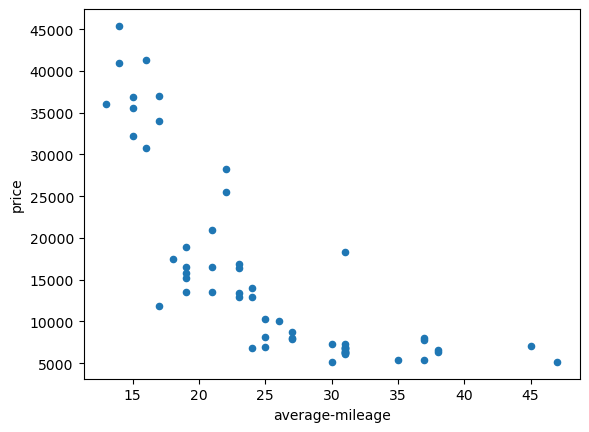

In [104]:
df.plot.scatter('average-mileage', 'price')

## Draw a Bar Plot
Write a Python program that draws a bar plot to visualize the average price of cars for each company. 

In [105]:
bp = df.groupby('company')['price']
